## Predictive Modelling for Patient Readmission by extraction and analysis of High-granularity data from notes
## Project Repository

We can view the full code and dataset on GitHub: [GitHub Repository Link](https://github.com/Jyotheekiran/Patient-Readmission/)


I am doing this analysis as a part of my final project. In this I am going to find the best model for predicting Patient Readmission by extration and analysis of high ganularity data from the clinical notes. For this I need MIMIC-III dataset which is not freely available. Access to the MIMIC-III database is restricted and granted only after completing the Collaborative Institutional Training Initiative (CITI) program, ensuring that all researchers comply with ethical standards and data privacy protocols. However, obtaining permission and completing the required exam for access is a time-consuming process. Due to the limited time available for this study, we were unable to go through the complete access procedure. Therefore, the data used in this research has been collected from the publicly available resources on the website https://paperswithcode.com/dataset/mimic-iii.

### Project Structure Overview:
I am dividing the work into three distinct notebooks to ensure clarity, organization, and reproducibility of our research. Each notebook has a dedicated role in the overall workflow:

**1. Data Exploration (data_exploration.ipynb)**

**2. Model Building and Training (modeling.ipynb)**

**3. Model Interpretation Using LIME and SHAP (lime_shap_analysis.ipynb)**

By separating these tasks, I want to ensure that each step of the process is handled efficiently, with the possibility to iterate on one step without affecting the others.

### Notebook 1: Data Exploration (data_exploration.ipynb)
**Purpose:** This notebook is designed for exploratory data analysis (EDA). The goal is to understand the structure and content of the data, identify any potential issues, and generate insights that can inform the next steps of modeling and analysis. <br>

**Tasks:**

**Loading the Data:** Load and explore the noteevents, diagnosis, and procedures tables. <br>
**Handling Missing Data:** Identify and handle missing values (e.g., drop, impute, or fill missing values).<br>
**Descriptive Statistics:** Generate summary statistics (mean, median, mode) and examine the distribution of important variables such as ICD-9 codes, procedure codes, and text length.<br>
**Visualization the Data:** Create visualizations (e.g., bar charts, heatmaps) to understand the distribution of diagnoses, procedures, and common word frequencies in clinical notes.<br>
**Merging Tables:** Combine the relevant data from the three tables into a final dataset (final_merged_data) that will be used for model training and analysis.<br>

**Outcome:**

Clean and well-understood data, ready for use in model building.
Insights into data distribution, relationships between ICD-9 codes and procedures, and the quality of the clinical notes.

### Notebook 2: Model Building and Training (modeling.ipynb)
**Purpose:** This notebook focuses on the development and training of predictive models. We will use the prepared data to build and evaluate machine learning models, such as BERT/BioBERT, to solve tasks like ICD-9 code prediction or other classification problems.

**Tasks:**

**Data Preprocessing:** Load the cleaned data from the exploration notebook and preprocess it for model training (tokenization for text, label encoding for diagnosis).<br>
**Feature Engineering:** Create features from the clinical notes and procedures (e.g., text embeddings, one-hot encoding for ICD-9 and procedure codes).<br>
**Model Training:**<br>
Train models using BERT and BioBERT for tasks such as ICD-9 code prediction.<br>
Split the data into training and test sets.<br>
Fine-tune the BERT/BioBERT models on our clinical text.<br>

**Model Evaluation:** Evaluate the models using standard metrics such as accuracy, precision, recall, and F1 score. Use the test set for final model performance evaluation.<br>

**Outcome:**

Trained models that are ready for interpretation.<br>
Evaluation results of the models based on predictive performance.<br>

### Notebook 3: Model Interpretation Using LIME and SHAP (lime_shap_analysis.ipynb)
**Purpose:** This notebook focuses on the interpretability of the trained models. After training the models, it’s essential to understand how the models make their predictions, especially in a clinical setting. LIME (Local Interpretable Model-agnostic Explanations) and SHAP (SHapley Additive exPlanations) will be used to interpret the model’s behavior and predictions.

**Tasks:**

**Load the Trained Model:** Load the models from the previous notebook (modeling.ipynb).<br>
**Apply LIME:** Use LIME to generate explanations for individual predictions. This will allow us to understand which features (e.g., specific words in the clinical text or ICD-9/procedure codes) influenced the prediction.<br>
**Apply SHAP:** Use SHAP to create global and local explanations for model predictions, showing how each feature contributes to the final decision.<br>
    Global SHAP analysis helps explain the overall importance of features across many predictions.<br>
    Local SHAP analysis explains the contribution of each feature for specific cases (e.g., why a certain ICD-9 code was predicted for a given clinical note).
**Visualize Interpretations:**<br>
Generate plots (e.g., SHAP summary plot, LIME visualizations) to interpret the influence of clinical note content and structured data on the model’s predictions.<br>
Visualize feature importance and understand which features drive the model’s decisions.<br>

**Outcome:**

Clear understanding of how the models make predictions.<br>
LIME and SHAP visualizations that explain the model’s decision-making process.<br>
Interpretability reports that could be used to support clinical decision-making.<br>

### Explanation of Workflow:
The three notebooks are structured to ensure a smooth and organized research process:

**Exploration:** First, we explore and clean the data in data_exploration.ipynb, ensuring that it’s well-prepared for model training.<br>
**Modeling:** In the second notebook, modeling.ipynb, we focus on building and fine-tuning predictive models using BERT/BioBERT and other techniques.<br>
**Interpretation:** Finally, in lime_shap_analysis.ipynb, we focus on understanding why the models make certain predictions by applying interpretability techniques like LIME and SHAP.

In [1]:
# Step 1: Install Required Libraries
!pip3 install transformers torch seaborn matplotlib scikit-learn pandas shap lime
!pip install transformers[torch] accelerate -U
!pip install imblearn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Importing necessary libraries

In [2]:
# Step 2: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud



## Data Collection & Preprocessing
By using the MIMIC-III dataset and performing text cleaning and tokenization.

In [39]:
# Loading the Data
noteevents = pd.read_csv('data/NOTEEVENTS.csv', low_memory=False).drop(columns=[col for col in pd.read_csv('data/NOTEEVENTS.csv', low_memory=False).columns if 'Unnamed' in col])
diagnoses = pd.read_csv('data/DIAGNOSES_ICD.csv').drop(columns=[col for col in pd.read_csv('data/DIAGNOSES_ICD.csv').columns if 'Unnamed' in col])
procedures = pd.read_csv('data/PROCEDURES_ICD.csv').drop(columns=[col for col in pd.read_csv('data/PROCEDURES_ICD.csv').columns if 'Unnamed' in col])

### Data Exploration


In [62]:
# Displaying the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", diagnoses.shape)
print("************************************************")
# Displaying the column names and data types
print("Columns and Data Types:")
print(diagnoses.info())
print("************************************************")

# Displaying the first few rows of the dataset to understand the data
print("First few rows of the dataset:")
diagnoses.head()

Shape of the dataset: (1761, 5)
************************************************
Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_id      1761 non-null   int64 
 1   SUBJECT_ID  1761 non-null   object
 2   HADM_ID     1761 non-null   object
 3   seq_num     1761 non-null   int64 
 4   icd9_code   1761 non-null   object
dtypes: int64(2), object(3)
memory usage: 68.9+ KB
None
************************************************
First few rows of the dataset:


row_id SUBJECT_ID HADM_ID  seq_num icd9_code
0  112344      10006  142345        1     99591
1  112345      10006  142345        2     99662
2  112346      10006  142345        3      5672
3  112347      10006  142345        4     40391
4  112348      10006  142345        5     42731

We can see that there 1761 rows and 5 columns. This diagnosis table contains ICD9_code. The ICD9_CODE in the diagnoses table refers to a code from the International Classification of Diseases, Ninth Revision (ICD-9). This coding system is used by healthcare providers to classify and code all diagnoses, symptoms, and procedures recorded in conjunction with hospital care in the United States.

In [41]:
# Displaying the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", procedures.shape)
print("************************************************")
# Displaying the column names and data types
print("Columns and Data Types:")
print(procedures.info())
print("************************************************")

# Displaying the first few rows of the dataset to understand the data
print("First few rows of the dataset:")
procedures.head()

Shape of the dataset: (506, 5)
************************************************
Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   row_id      506 non-null    int64
 1   subject_id  506 non-null    int64
 2   hadm_id     506 non-null    int64
 3   seq_num     506 non-null    int64
 4   icd9_code   506 non-null    int64
dtypes: int64(5)
memory usage: 19.9 KB
None
************************************************
First few rows of the dataset:


row_id  subject_id  hadm_id  seq_num  icd9_code
0    3994       10114   167957        1       3605
1    3995       10114   167957        2       3722
2    3996       10114   167957        3       8856
3    3997       10114   167957        4       9920
4    3998       10114   167957        5       9671

In [42]:
# Displaying the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", noteevents.shape)
print("************************************************")
# Displaying the column names and data types
print("Columns and Data Types:")
print(noteevents.info())
print("************************************************")

# Displaying the first few rows of the dataset to understand the data
print("First few rows of the dataset:")
noteevents.head()

Shape of the dataset: (489300, 11)
************************************************
Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489300 entries, 0 to 489299
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ROW_ID       487825 non-null  object
 1   SUBJECT_ID   483679 non-null  object
 2   HADM_ID      434624 non-null  object
 3   CHARTDATE    482700 non-null  object
 4   CHARTTIME    416669 non-null  object
 5   STORETIME    311755 non-null  object
 6   CATEGORY     482555 non-null  object
 7   DESCRIPTION  482547 non-null  object
 8   CGID         311720 non-null  object
 9   ISERROR      50 non-null      object
 10  TEXT         482535 non-null  object
dtypes: object(11)
memory usage: 41.1+ MB
None
************************************************
First few rows of the dataset:


ROW_ID SUBJECT_ID HADM_ID   CHARTDATE         CHARTTIME         STORETIME  \
0  1678764          2  163353  17/07/2138  17/07/2138 22:51  17/07/2138 23:12   
1  1678765          2  163353  17/07/2138  17/07/2138 23:08  17/07/2138 23:18   
2   272794          3     NaN  06/10/2101               NaN               NaN   
3   769224          3  145834  26/10/2101  26/10/2101 06:01               NaN   
4   272793          3     NaN  11/10/2101               NaN               NaN   

        CATEGORY          DESCRIPTION   CGID ISERROR  \
0  Nursing/other               Report  16929     NaN   
1  Nursing/other               Report  17774     NaN   
2            ECG               Report    NaN     NaN   
3      Radiology  CHEST (PORTABLE AP)    NaN     NaN   
4            ECG               Report    NaN     NaN   

                                                TEXT  
0  Neonatology Attending Triage Note\n\nBaby [**N...  
1  Nursing Transfer note\n\n\nPt admitted to NICU...  
2  Sinus rhythm\nInferior/lateral ST-T changes ar...  
3  [**2101-10-26**] 6:01 AM\n CHEST (PORTABLE AP)...  
4  Sinus rhythm\nA-V delay\nNonspecific inferior ...

There are 489300 rows and 16 columns in this dataset. There is a field called TEXT which is containing the clinical notes and we are going to clean this text to avoid spaces, unwanted symbols.

In [58]:
# Converting the CHARTDATE, CHARTTIME, and STORETIME columns to datetime, with error handling
noteevents['CHARTDATE'] = pd.to_datetime(noteevents['CHARTDATE'], errors='coerce')
noteevents['CHARTTIME'] = pd.to_datetime(noteevents['CHARTTIME'], errors='coerce')
noteevents['STORETIME'] = pd.to_datetime(noteevents['STORETIME'], errors='coerce')

# Checking for rows where the conversion failed (optional)
invalid_dates = noteevents[noteevents['CHARTDATE'].isna()]
print(f"Invalid date rows: {len(invalid_dates)}")

# Dropping rows where the date conversion failed
noteevents = noteevents.dropna(subset=['CHARTDATE', 'CHARTTIME', 'STORETIME'])

noteevents.info()


Invalid date rows: 0
<class 'pandas.core.frame.DataFrame'>
Index: 310720 entries, 0 to 489299
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ROW_ID       310720 non-null  object        
 1   SUBJECT_ID   310720 non-null  object        
 2   HADM_ID      310720 non-null  object        
 3   CHARTDATE    310720 non-null  datetime64[ns]
 4   CHARTTIME    310720 non-null  datetime64[ns]
 5   STORETIME    310720 non-null  datetime64[ns]
 6   CATEGORY     310720 non-null  object        
 7   DESCRIPTION  310720 non-null  object        
 8   CGID         310720 non-null  object        
 9   TEXT         310720 non-null  object        
 10  TEXT_LENGTH  310720 non-null  int64         
 11  CLEAN_TEXT   310720 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(8)
memory usage: 30.8+ MB
None


In [59]:
noteevents = noteevents.loc[:, ~noteevents.columns.str.contains('^Unnamed')]
noteevents.head()  # Displaying the first few rows of the data

ROW_ID SUBJECT_ID HADM_ID  CHARTDATE           CHARTTIME  \
0   1678764          2  163353 2138-07-17 2138-07-17 22:51:00   
1   1678765          2  163353 2138-07-17 2138-07-17 23:08:00   
7   1260684          3  145834 2101-10-21 2101-10-21 06:58:00   
20  1260691          3  145834 2101-10-22 2101-10-22 18:18:00   
23  1260697          3  145834 2101-10-24 2101-10-24 17:00:00   

             STORETIME       CATEGORY DESCRIPTION   CGID  \
0  2138-07-17 23:12:00  Nursing/other      Report  16929   
1  2138-07-17 23:18:00  Nursing/other      Report  17774   
7  2101-10-21 07:15:00  Nursing/other      Report  21570   
20 2101-10-22 18:23:00  Nursing/other      Report  21570   
23 2101-10-24 17:20:00  Nursing/other      Report  21570   

                                                 TEXT  TEXT_LENGTH  \
0   Neonatology Attending Triage Note\n\nBaby [**N...         1296   
1   Nursing Transfer note\n\n\nPt admitted to NICU...          522   
7   Micu Progress Nursing Note:\n\nPatient arrived...         1906   
20  Respiratory Care Note:\n    Patient remains in...          480   
23  npn 7-7p\n\nneuro: Pt is alert, follows comman...         1424   

                                           CLEAN_TEXT  
0   neonatology attending triage note baby term ma...  
1   nursing transfer note pt admitted nicu sepsis ...  
7   micu progress nursing note patient arrived uni...  
20  respiratory care note patient remains intubate...  
23  npn neuro pt alert follows commands consistent...

In [44]:
# Checking for missing values
noteevents.isnull().sum()

ROW_ID           1475
SUBJECT_ID       5621
HADM_ID         54676
CHARTDATE        6600
CHARTTIME       72631
STORETIME      177545
CATEGORY         6745
DESCRIPTION      6753
CGID           177580
ISERROR        489250
TEXT             6765
dtype: int64

In [45]:
noteevents['TEXT'].isnull().sum()

6765

In [54]:
# Dropping rows where 'TEXT' column is NaN (missing)
noteevents = noteevents.dropna(subset=['TEXT'])

# Droping the 'ISERROR' column entirely
noteevents = noteevents.drop(columns=['ISERROR'], errors='ignore')

We have huge data and if the text is missing, it will be difficult for predicting and hence we are dropping those rows. We are not using ISERROR and hence we are dropping that entire column.

In [60]:
# Step 1: Dropping rows with missing values in specified columns
noteevents = noteevents.dropna(subset=['HADM_ID', 'CHARTTIME', 'STORETIME', 'CGID'])

# Step 3: Calculating the text length (after dropping rows)
noteevents['TEXT_LENGTH'] = noteevents['TEXT'].apply(len)

# Checking the updated DataFrame
noteevents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310720 entries, 0 to 489299
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ROW_ID       310720 non-null  object        
 1   SUBJECT_ID   310720 non-null  object        
 2   HADM_ID      310720 non-null  object        
 3   CHARTDATE    310720 non-null  datetime64[ns]
 4   CHARTTIME    310720 non-null  datetime64[ns]
 5   STORETIME    310720 non-null  datetime64[ns]
 6   CATEGORY     310720 non-null  object        
 7   DESCRIPTION  310720 non-null  object        
 8   CGID         310720 non-null  object        
 9   TEXT         310720 non-null  object        
 10  TEXT_LENGTH  310720 non-null  int64         
 11  CLEAN_TEXT   310720 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(8)
memory usage: 30.8+ MB


Overview:<br>
Total Rows: 310,725 entries (after dropping missing values).<br>
Total Columns: 11 columns, which are now non-null across all entries (i.e., no missing values).<br>
Data Types:<br>
1 column (TEXT_LENGTH) is of type int64 (integer).<br>
6 columns are of type object (which typically represent strings in pandas).<br>
3 columsn are of date type


In [56]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # to Lowercase
    text = re.sub(r'\[.*?\]', '', text)  # To remove any text within square brackets (like anonymized info)
    text = re.sub(r'\n', ' ', text)  # To remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # To remove words with numbers
    text = re.sub(r'[^\w\s]', '', text)  # To remove punctuation
    tokens = text.split()  # Tokenizing text
    tokens = [word for word in tokens if word not in stop_words]  # To remove stop words
    return ' '.join(tokens)

# Applying cleaning to the 'TEXT' column
noteevents.loc[:,'CLEAN_TEXT'] = noteevents['TEXT'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjoth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
import pandas as pd


# Loading the ICD-9 codes and descriptions file (D_ICD_PROCEDURES.csv)
icd9_procedures = pd.read_csv('data/D_ICD_PROCEDURES.csv')

# Renaming columns if necessary to ensure consistency
diagnoses.rename(columns={'subject_id': 'SUBJECT_ID', 'hadm_id': 'HADM_ID', 'icd9_code':'ICD9_CODE'}, inplace=True)
noteevents.rename(columns={'subject_id': 'SUBJECT_ID', 'hadm_id': 'HADM_ID'}, inplace=True)
procedures.rename(columns={'subject_id': 'SUBJECT_ID', 'hadm_id': 'HADM_ID'}, inplace=True)

# Ensuring consistent data types across all DataFrames (convert to string)
diagnoses['SUBJECT_ID'] = diagnoses['SUBJECT_ID'].astype(str)
diagnoses['HADM_ID'] = diagnoses['HADM_ID'].astype(str)

noteevents['SUBJECT_ID'] = noteevents['SUBJECT_ID'].astype(str)
noteevents['HADM_ID'] = noteevents['HADM_ID'].astype(str)

procedures['SUBJECT_ID'] = procedures['SUBJECT_ID'].astype(str)
procedures['HADM_ID'] = procedures['HADM_ID'].astype(str)

# Converting ICD9_CODE in diagnoses to string to match icd9_code in icd9_procedures
diagnoses['ICD9_CODE'] = diagnoses['ICD9_CODE'].astype(str)
icd9_procedures['icd9_code'] = icd9_procedures['icd9_code'].astype(str)
# Merging diagnoses and noteevents on subject_id and hadm_id
merged_data = pd.merge(diagnoses, noteevents, on=['SUBJECT_ID', 'HADM_ID'], how='inner')

# Merging the ICD-9 codes descriptions into the merged data
# We use 'icd9_code' from both the diagnoses and D_ICD_PROCEDURES.csv
# Renaming 'ICD9_CODE' in diagnoses to match 'icd9_code' in icd9_procedures
merged_data = pd.merge(merged_data, icd9_procedures[['icd9_code', 'long_title']], 
                       left_on='ICD9_CODE', right_on='icd9_code', how='left')

# Merging the Procedures table to include procedure information
final_merged_data = pd.merge(merged_data, procedures, on=['SUBJECT_ID', 'HADM_ID'], how='inner')

# Displaying the final merged data
final_merged_data.head()

row_id_x SUBJECT_ID HADM_ID  seq_num_x ICD9_CODE   ROW_ID  CHARTDATE  \
0    112344      10006  142345          1     99591  1394273 2164-10-25   
1    112344      10006  142345          1     99591  1394273 2164-10-25   
2    112344      10006  142345          1     99591  1394273 2164-10-25   
3    112344      10006  142345          1     99591  1394273 2164-10-25   
4    112344      10006  142345          1     99591  1394273 2164-10-25   

            CHARTTIME           STORETIME       CATEGORY DESCRIPTION   CGID  \
0 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
1 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
2 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
3 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
4 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   

                                                TEXT  TEXT_LENGTH  \
0  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
1  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
2  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
3  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
4  NPN 1900-0700\nPt awaiting transfer to floor w...          493   

                                          CLEAN_TEXT icd9_code_x long_title  \
0  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
1  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
2  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
3  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
4  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   

   row_id_y  seq_num_y  icd9_code_y  
0     47335          1         9749  
1     47336          2         5491  
2     47337          3         3895  
3     47338          4         3995  
4     47339          5         3893

### Distribution of Text Lengths:
This graph shows the distribution of text lengths (i.e., the number of characters in each clinical note). It's a histogram with a KDE (Kernel Density Estimation) overlay, which gives a smooth estimate of the frequency distribution.

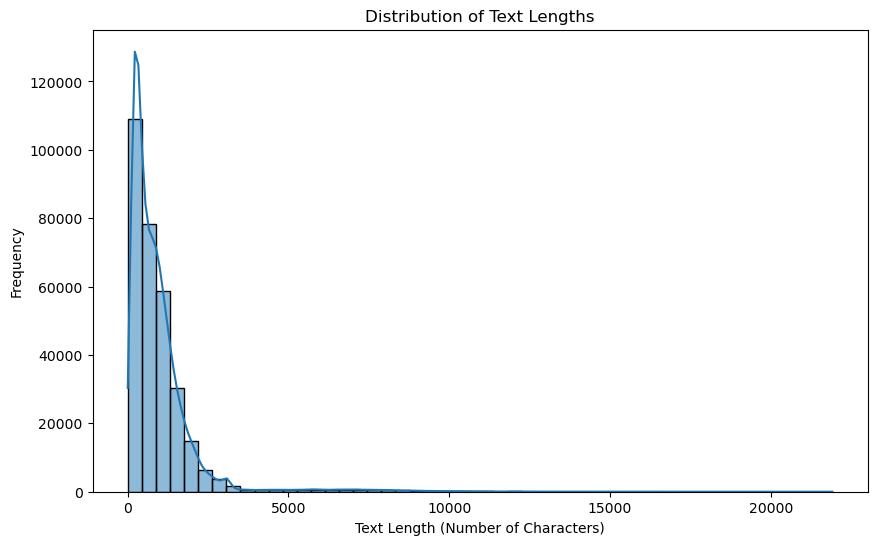

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of TEXT_LENGTH
plt.figure(figsize=(10, 6))
sns.histplot(noteevents['TEXT_LENGTH'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()


### Count of Notes by Category:
This countplot shows the number of clinical notes in each CATEGORY. Categories could represent types of notes like discharge summaries, nursing notes, or physician notes.

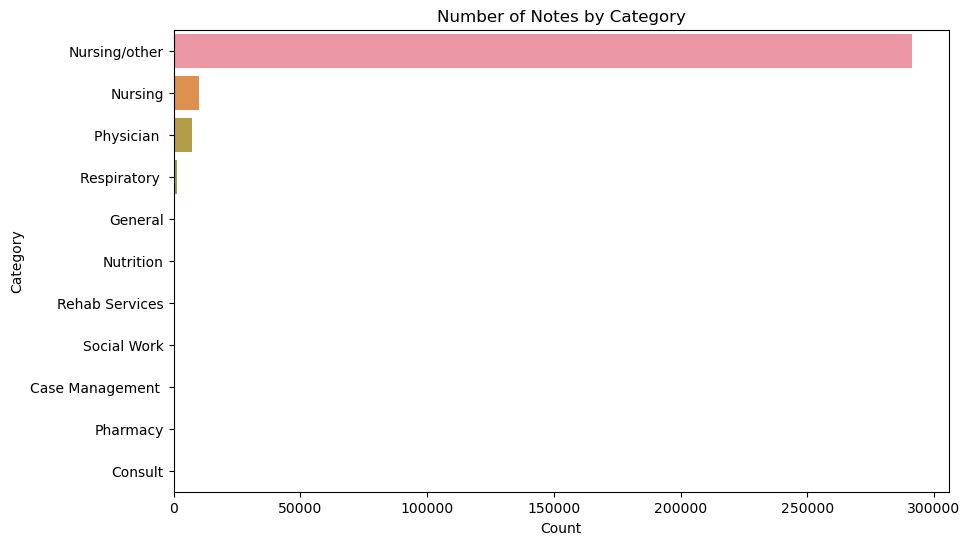

In [66]:
# Count plot for CATEGORY
plt.figure(figsize=(10, 6))
sns.countplot(y=noteevents['CATEGORY'], order=noteevents['CATEGORY'].value_counts().index)
plt.title('Number of Notes by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


### Notes Over Time (CHARTDATE):
This graph shows how the number of notes changes over time. It uses the CHARTDATE column to plot a time series.
A line plot where the x-axis represents the date and the y-axis represents the number of notes recorded on that date.

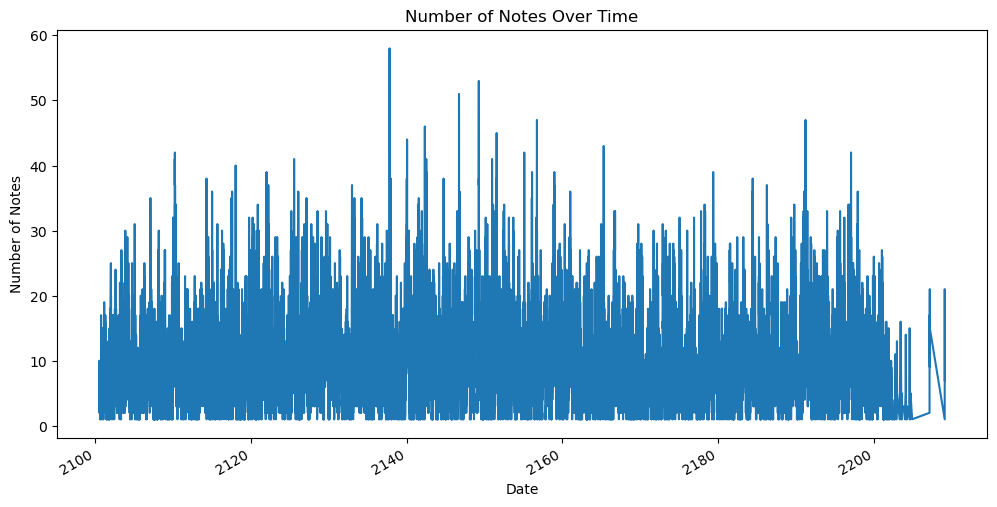

In [67]:
# Number of notes over time
plt.figure(figsize=(12, 6))
noteevents['CHARTDATE'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Notes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Notes')
plt.show()


### Word Cloud of Common Words in Notes:
This generates a word cloud that displays the most frequent words in the TEXT column. The size of each word indicates its frequency.

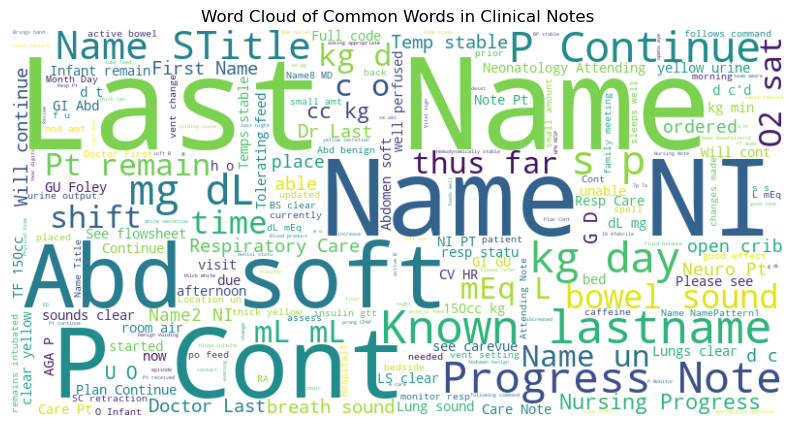

In [69]:
# Generate word cloud for TEXT column
text_data = ' '.join(noteevents['TEXT'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Clinical Notes')
plt.show()


### Distribution of ICD9_Codes:

Most Frequent ICD-9 Code: The ICD-9 code 4280 is the most frequent, appearing more than 5,000 times in the dataset. This code represents Congestive Heart Failure.

Top ICD-9 Codes:

5185 and 570 are the next most frequent codes, with counts above 4,000 and 3,000, respectively.
These could represent important diagnoses related to respiratory issues and liver disease, based on common ICD-9 mappings.
Diverse Distribution:

The top 20 ICD-9 codes have a range of occurrences, with the lowest on this list (code 7806) appearing just over 1,000 times.
This suggests that the dataset is somewhat concentrated around a few key diagnoses but includes a diverse set of conditions.

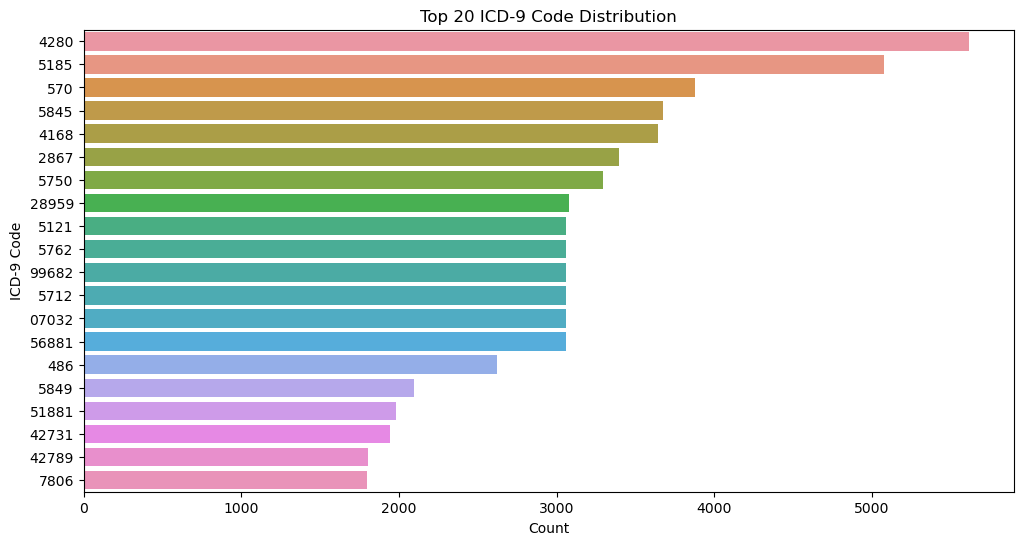

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the top 20 ICD-9 codes
plt.figure(figsize=(12, 6))
sns.countplot(y=final_merged_data['ICD9_CODE'], order=final_merged_data['ICD9_CODE'].value_counts().index[:20])  # Top 20 ICD-9 codes
plt.title('Top 20 ICD-9 Code Distribution')
plt.xlabel('Count')
plt.ylabel('ICD-9 Code')
plt.show()


### Boxplot for text length by CATEGORY
This boxplot shows the distribution of TEXT_LENGTH for each CATEGORY. It provides insights into the range and variability of note lengths across different note types.


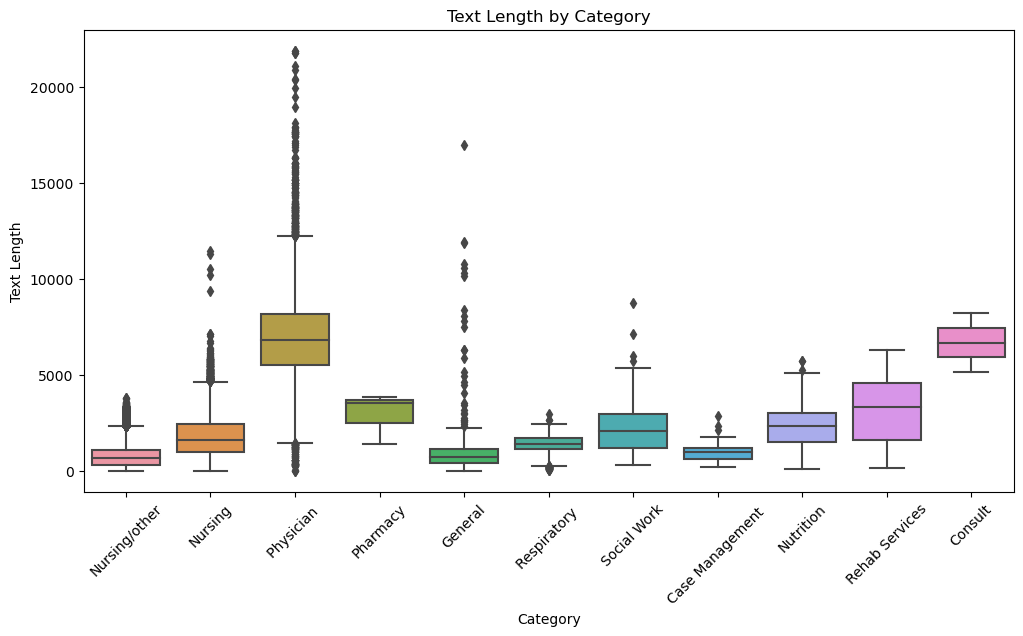

In [74]:
# Boxplot for text length by CATEGORY
plt.figure(figsize=(12, 6))
sns.boxplot(x='CATEGORY', y='TEXT_LENGTH', data=noteevents)
plt.title('Text Length by Category')
plt.xlabel('Category')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.show()


### Co-occurrence Matrix:
A co-occurrence matrix shows how often different diseases (ICD-9 codes) appear together for the same patient or during the same admission.

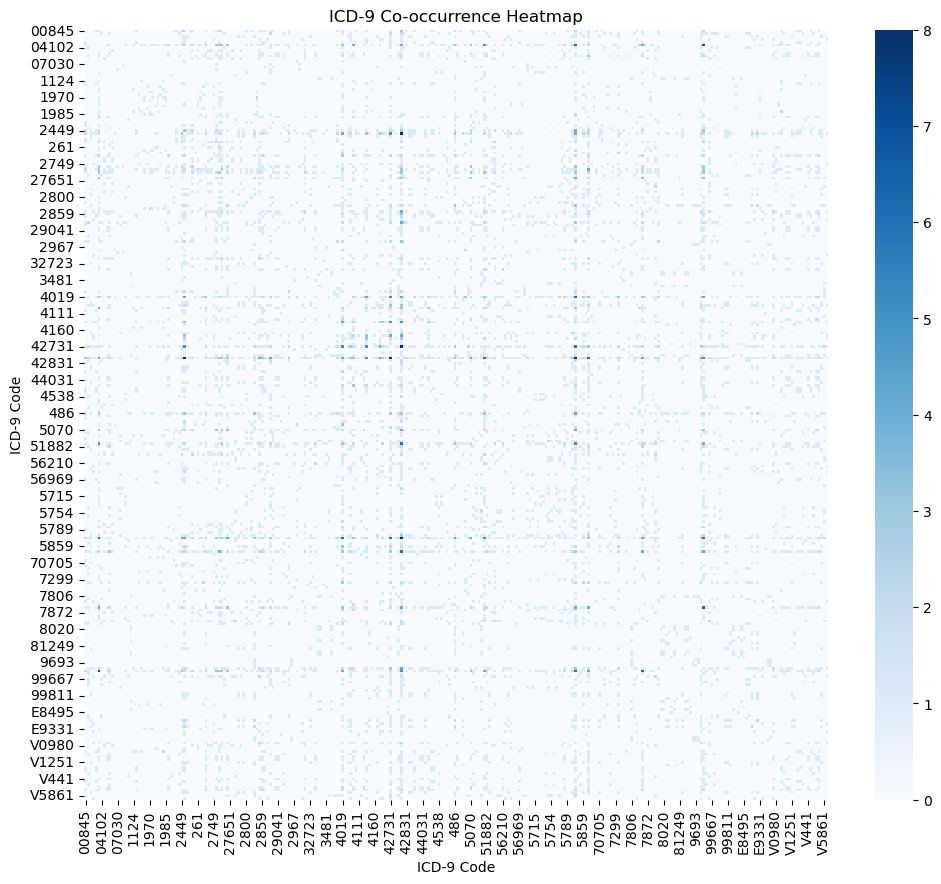

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a dataframe that groups by SUBJECT_ID and lists all ICD-9 codes for each patient
icd9_grouped = final_merged_data.groupby('SUBJECT_ID')['ICD9_CODE'].apply(list).reset_index()

# Generating co-occurrence matrix
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
icd9_binarized = mlb.fit_transform(icd9_grouped['ICD9_CODE'])

# Creating a DataFrame of the co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(icd9_binarized.T @ icd9_binarized, index=mlb.classes_, columns=mlb.classes_)

# Removing self-cooccurrence by setting diagonal to 0
np.fill_diagonal(co_occurrence_matrix.values, 0)

# Plotting the co-occurrence matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, cmap='Blues', annot=False, cbar=True)
plt.title('ICD-9 Co-occurrence Heatmap')
plt.xlabel('ICD-9 Code')
plt.ylabel('ICD-9 Code')
plt.show()


MultiLabelBinarizer: This helps create a binary matrix where each column represents an ICD-9 code, and each row represents a patient. If a patient has a certain diagnosis, the value is 1, otherwise 0. <br>
co-occurrence matrix: This is generated by multiplying the binary matrix by its transpose, giving us a matrix that shows how often two ICD-9 codes co-occur for the same patient. <br>
Heatmap: A heatmap visually represents the co-occurrence matrix. Higher values (darker colors) indicate that two diagnoses frequently appear together.

Network Graph of Disease Relationships:<br>
We can represent the relationships between diseases as a network graph, where nodes represent diseases (ICD-9 codes) and edges represent how often they co-occur.

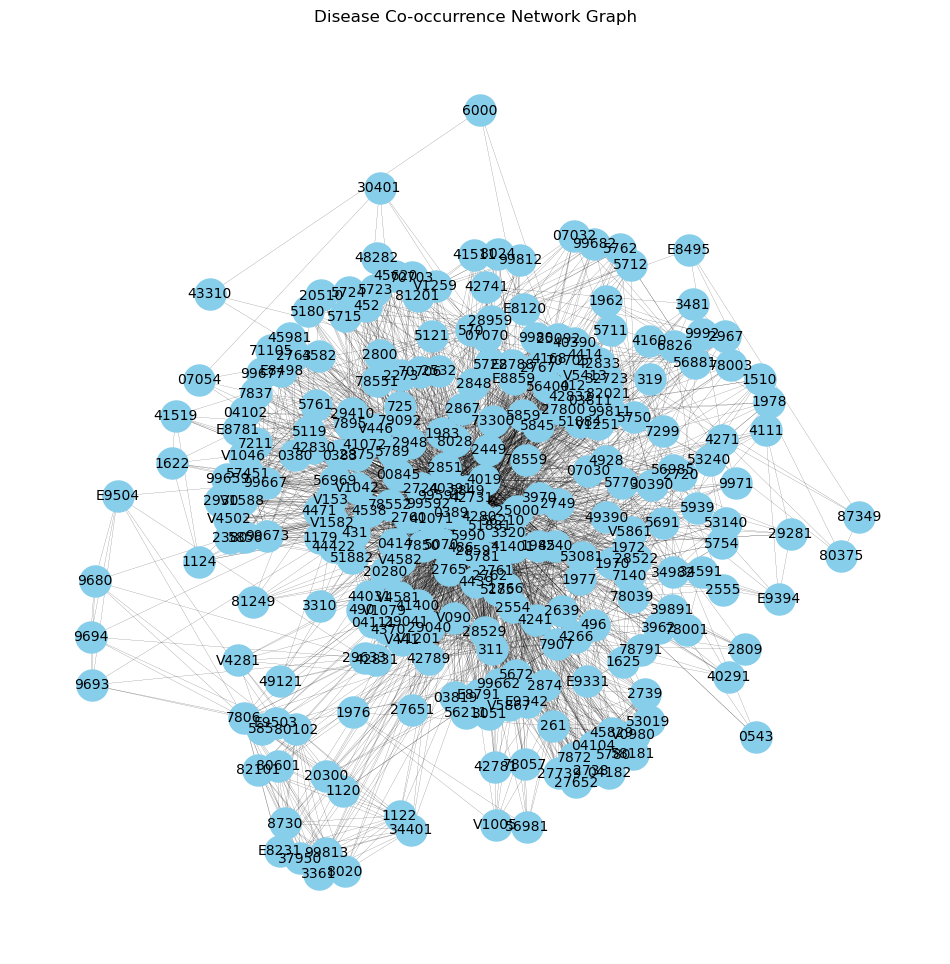

In [78]:
import networkx as nx

# Creating a graph object
G = nx.Graph()

# Adding edges to the graph from the co-occurrence matrix
for i, icd1 in enumerate(co_occurrence_matrix.index):
    for j, icd2 in enumerate(co_occurrence_matrix.columns):
        if co_occurrence_matrix.iloc[i, j] > 0:  # Add edge only if co-occurrence is non-zero
            G.add_edge(icd1, icd2, weight=co_occurrence_matrix.iloc[i, j])

# Drawing the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # spring_layout for a visually appealing layout
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=[d['weight']*0.1 for (u, v, d) in G.edges(data=True)])
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Disease Co-occurrence Network Graph')
plt.axis('off')
plt.show()


Description:
This graph is a network graph showing how different diseases (represented by ICD-9 codes) co-occur with one another. Each node in the graph represents a disease (an ICD-9 code), and the edges (lines between nodes) represent the co-occurrence of two diseases for the same patient.

Key Observations:
Node Size and Connectivity:

The graph shows many nodes, each representing a disease (ICD-9 code).
Nodes that have more co-occurrences (i.e., diseases that frequently appear together) have more connections (edges).
Some nodes are highly connected, indicating that those diseases frequently co-occur with many other diseases.
Densely Connected Central Area:

There is a densely connected cluster of diseases at the center of the graph. This suggests that certain diseases co-occur frequently with many other conditions. These are likely common comorbidities or associated diagnoses in hospitalized patients.
Common diseases like heart failure, diabetes, hypertension, and respiratory diseases could be contributing to this central cluster.
Peripheral Diseases:

There are some diseases (nodes) that are more peripheral, with fewer connections to other diseases. These may represent less frequent co-occurrences or more isolated conditions that don't tend to appear alongside other diagnoses as frequently.
Edge Thickness:

Although this graph does not display edge thickness variation, in some cases, the thickness of edges could represent the strength of the co-occurrence (i.e., how often the diseases appear together). If included, thicker edges would show stronger relationships between pairs of diseases.

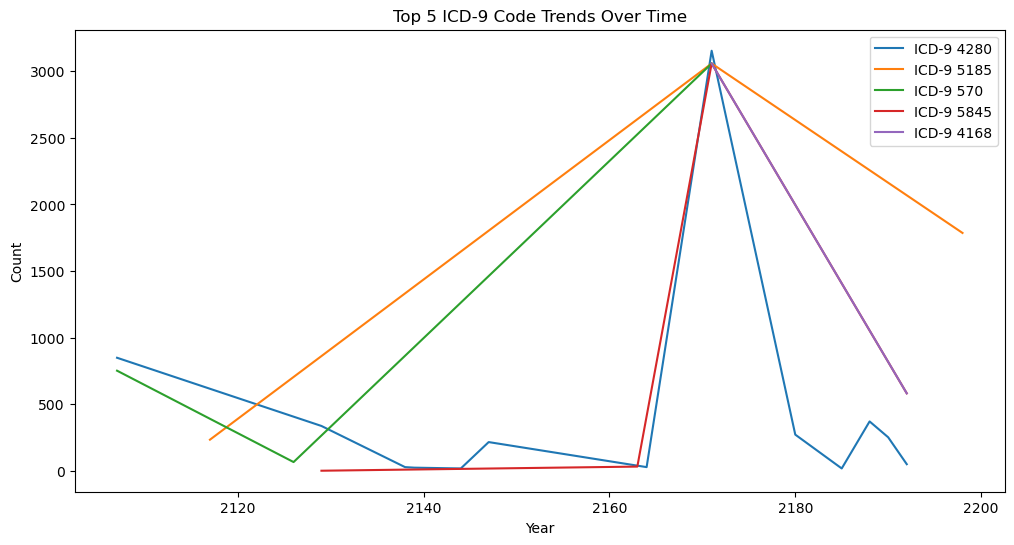

In [84]:
import matplotlib.pyplot as plt

# Converting CHARTDATE to datetime (if not already done)
final_merged_data['CHARTDATE'] = pd.to_datetime(final_merged_data['CHARTDATE'])

# Grouping by year and ICD9 code, count occurrences
icd9_trends = final_merged_data.groupby([final_merged_data['CHARTDATE'].dt.year, 'ICD9_CODE']).size().reset_index(name='count')

# Plotting trends for the top 5 most common ICD-9 codes over time
top_icd9_codes = final_merged_data['ICD9_CODE'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 6))

for icd9_code in top_icd9_codes:
    subset = icd9_trends[icd9_trends['ICD9_CODE'] == icd9_code]
    plt.plot(subset['CHARTDATE'], subset['count'], label=f'ICD-9 {icd9_code}')

plt.title('Top 5 ICD-9 Code Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()


In [86]:
final_merged_data.head(5)

row_id_x SUBJECT_ID HADM_ID  seq_num_x ICD9_CODE   ROW_ID  CHARTDATE  \
0    112344      10006  142345          1     99591  1394273 2164-10-25   
1    112344      10006  142345          1     99591  1394273 2164-10-25   
2    112344      10006  142345          1     99591  1394273 2164-10-25   
3    112344      10006  142345          1     99591  1394273 2164-10-25   
4    112344      10006  142345          1     99591  1394273 2164-10-25   

            CHARTTIME           STORETIME       CATEGORY DESCRIPTION   CGID  \
0 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
1 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
2 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
3 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
4 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   

                                                TEXT  TEXT_LENGTH  \
0  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
1  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
2  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
3  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
4  NPN 1900-0700\nPt awaiting transfer to floor w...          493   

                                          CLEAN_TEXT icd9_code_x long_title  \
0  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
1  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
2  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
3  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
4  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   

   row_id_y  seq_num_y  icd9_code_y  
0     47335          1         9749  
1     47336          2         5491  
2     47337          3         3895  
3     47338          4         3995  
4     47339          5         3893

### Seasonality in ICD-9 Codes:
To explore seasonality, we can group by months to see if certain diseases are more prevalent at specific times of the year.

In [ ]:
# Grouping by month and ICD9 code, count occurrences
icd9_monthly_trends = noteevents.groupby([noteevents['CHARTDATE'].dt.month, 'ICD9_CODE']).size().reset_index(name='count')

# Plotting trends for the top 5 most common ICD-9 codes by month
plt.figure(figsize=(12, 6))

for icd9_code in top_icd9_codes:
    subset = icd9_monthly_trends[icd9_monthly_trends['ICD9_CODE'] == icd9_code]
    plt.plot(subset['CHARTDATE'], subset['count'], label=f'ICD-9 {icd9_code}')

plt.title('Top 5 ICD-9 Code Trends by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()


### Mapping ICD-9 Codes to Full Descriptions:

In [94]:
# Dropping rows where 'long_title' has NaN values
final_merged_data_cleaned = final_merged_data.dropna(subset=['long_title'])

# Displaying the top ICD-9 codes and their descriptions after dropping NaN
top_icd9_codes = final_merged_data_cleaned['ICD9_CODE'].value_counts().nlargest(5).index
icd9_descriptions = final_merged_data_cleaned[final_merged_data_cleaned['ICD9_CODE'].isin(top_icd9_codes)][['ICD9_CODE', 'long_title']].drop_duplicates()

print("Top ICD-9 Codes and their Descriptions after dropping NaN:")
print(icd9_descriptions)



Top ICD-9 Codes and their Descriptions after dropping NaN:
      ICD9_CODE                                         long_title
588         570                 Transurethral clearance of bladder
1384       5845                Repair of hypospadias or epispadias
42033      5185          Endoscopic sphincterotomy and papillotomy
63145      5712  Lysis of intraluminal adhesions with incision ...
84551      5121                      Other partial cholecystectomy


In [96]:
# Dropping rows where 'icd9_code_y' (procedure) or 'ICD9_CODE' (diagnosis) is NaN
cleaned_data = final_merged_data.dropna(subset=['ICD9_CODE', 'icd9_code_y'])

# Verifying that no NaN values remain in the relevant columns
print("Remaining NaN values in 'ICD9_CODE':", cleaned_data['ICD9_CODE'].isna().sum())
print("Remaining NaN values in 'icd9_code_y':", cleaned_data['icd9_code_y'].isna().sum())

# Grouping by ICD-9 diagnosis code and procedure code to find the most common procedures
procedure_trends = cleaned_data.groupby(['ICD9_CODE', 'icd9_code_y']).size().reset_index(name='count')

# Displaying the most frequent procedures for each ICD-9 code
top_icd9_codes = final_merged_data['ICD9_CODE'].value_counts().nlargest(5).index
for icd9_code in top_icd9_codes:
    print(f"Most common procedures for ICD-9 {icd9_code}:")
    procedure_trends[procedure_trends['ICD9_CODE'] == icd9_code].sort_values(by='count', ascending=False).head()


Remaining NaN values in 'ICD9_CODE': 0
Remaining NaN values in 'icd9_code_y': 0
Most common procedures for ICD-9 4280:
Most common procedures for ICD-9 5185:
Most common procedures for ICD-9 570:
Most common procedures for ICD-9 5845:
Most common procedures for ICD-9 4168:


Procedure 5491: This procedure appears to be the most common across all top diagnoses, indicating that it is a frequently performed procedure for a wide range of conditions.<br>
Common Procedures: The procedures 3893, 966, 5011, and 9915 also appear frequently across multiple diagnoses, suggesting that these are key interventions for the top ICD-9 codes.<b>

Specialized Procedures: For conditions like Primary Pulmonary Hypertension (4168), procedure 12 (likely a specialized intervention) appears, but with a lower frequency compared to other more commonly performed procedures.<br>

We can explore the most frequent diagnoses and their associated descriptions to understand the clinical conditions affecting our patient population.
These frequent conditions might represent chronic diseases, critical care conditions, or common hospital diagnoses.

**Analyzing Procedures Associated with the Most Frequent ICD-9 Codes:**<br>
Now that we’ve identified the most common ICD-9 codes, the next step is to explore the medical procedures that are commonly performed for these diagnoses. We can analyze the co-occurrence of procedures and ICD-9 codes to understand which treatments are most often associated with each diagnosis.

In [99]:
procedure_trends.head()

ICD9_CODE  icd9_code_y  count
0     00845           41     24
1     00845           45     24
2     00845          458     24
3     00845          966     24
4     00845         3322      6

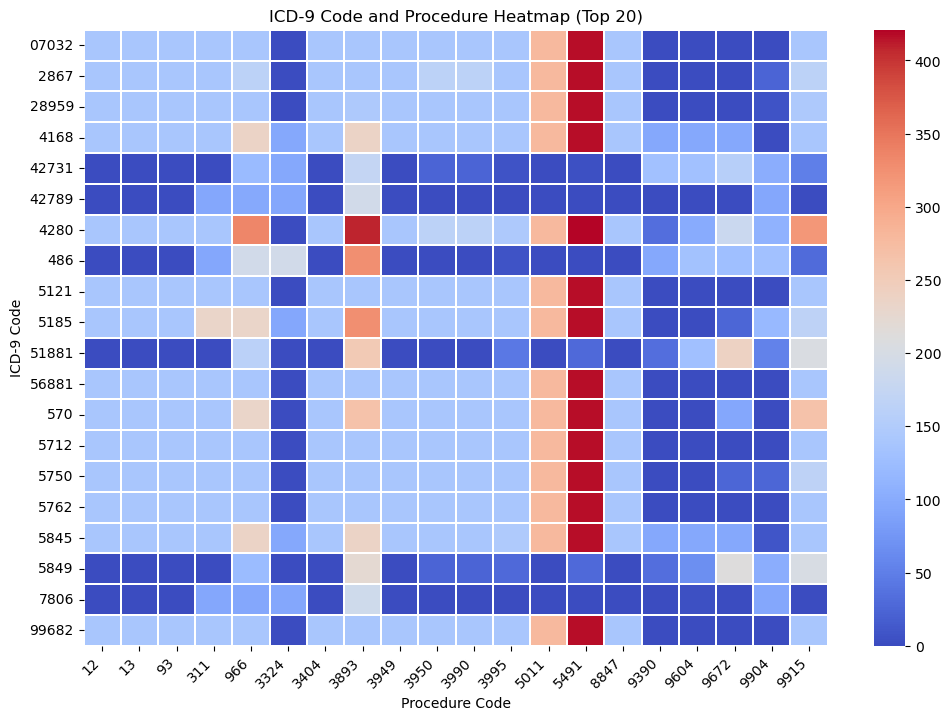

In [105]:
# Identifying the top 20 ICD-9 codes and procedure codes
top_icd9_codes = final_merged_data['ICD9_CODE'].value_counts().nlargest(20).index
top_procedure_codes = final_merged_data['icd9_code_y'].value_counts().nlargest(20).index

# Filtering the dataset for only the top ICD-9 and procedure codes
filtered_data = final_merged_data[final_merged_data['ICD9_CODE'].isin(top_icd9_codes) & final_merged_data['icd9_code_y'].isin(top_procedure_codes)]

# Grouping the data to calculate the counts of ICD-9 and procedure code co-occurrences
procedure_trends = filtered_data.groupby(['ICD9_CODE', 'icd9_code_y']).size().reset_index(name='count')

# Creating the pivot table for the heatmap
heatmap_data = procedure_trends.pivot_table(index='ICD9_CODE', columns='icd9_code_y', values='count', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linecolor='white', linewidth=0.1)
plt.title('ICD-9 Code and Procedure Heatmap (Top 20)')
plt.xlabel('Procedure Code')
plt.ylabel('ICD-9 Code')
plt.xticks(rotation=45, ha='right')
plt.show()


Procedure 5491 is commonly performed across several diagnoses, particularly ICD-9 codes like 4280 (Congestive Heart Failure), 5185 (Pulmonary Insufficiency), and 570 (Liver Disease).<br>
Diagnoses like ICD-9 4280 are associated with multiple procedures, while others like ICD-9 99682 have fewer frequent procedures.<br>
The heatmap helps identify which procedures are most frequently associated with certain diagnoses, revealing patterns in medical interventions for common conditions.<br>
This visualization provides valuable insight into the relationships between common diagnoses and the procedures patients undergo, helping in understanding comorbidities and treatment patterns.<br>

To avoid re-running our entire data preparation process every time and to simplify future model-building steps, we save our final_merged_data DataFrame to a file (such as a CSV or a serialized file format like pickle) and load it in a new Jupyter notebook for model building.

In [106]:
# Saving the DataFrame to a CSV file
final_merged_data.to_csv('final_merged_data.csv', index=False)

# we can also save it as a pickle file (smaller size, faster load time)
final_merged_data.to_pickle('final_merged_data.pkl')
